# GTI720 - Protection des renseignements personnels

## Laboratoire 2

| NOMS                  | CODE PERMANENT                                   |
|-----------------------|--------------------------------------------------|
| Étudiant1             | Code1                                            |
| Étudiant2             | Code2                                            |
| Étudiant3             | Code3                                            |

## Description
- Le but de ce laboratoire est de vous familiariser à la confidentialité différentielle. Vous allez apprendre entre autre à créer des mécanismes différentiellement confidentiels, à expliquer l'importance du paramètre de confidentialité $\epsilon$, à comprendre et utiliser les propriétés de composition de la confidentialité différentielle, faire l'analyse de confidentialité de mécanismes différentiellement confidentiels et à générer des données synthétiques préservant la vie privée. 
- Ce laboratoire est réalisé avec Python et les librairies `pandas`, `numpy`, `matplotlib`, `dduo-python`, `smartnoise-synth`. 
- Dans ce labo, on continuera à utiliser l'environnement virtuel python `gti720`.

### Partie I (85 points)

In [2]:
# importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# implémentation du mécanisme Laplace
def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

In [4]:
# implémentation du mécanisme Gaussien
def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

In [5]:
# renvoie le pourcentage d'erreur relative entre une requêt originale et sa version privée
def pct_error(orig, priv):
    return 100.0*np.abs(orig - priv)/orig

In [6]:
# importation du jeux de données
adult = pd.read_csv('https://github.com/tisl-lab/data-privacy-class/blob/main/data/adult_with_pii.csv?raw=true')
adult = adult.dropna()
adult

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Ardyce Golby,10/29/1961,212-61-8338,41328,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Jean O'Connor,6/28/1952,737-32-2919,94735,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Reuben Skrzynski,8/9/1966,314-48-0219,49628,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Caye Biddle,5/19/1978,647-75-3550,8213,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Question 1 (2 points)
Proposez une fonction `query_1` pour répondre à la question suivante: "Combien de personnes n'ont jamais été mariées?"

In [7]:
def query_1():
    return adult['Marital Status'].value_counts()['Never-married']

query_1()

9726

In [8]:
## test unitaire
assert query_1() == 9726

### Question 2 (2 points)
Quelle est la sensitivité globale $l_1$ de la fonction `query_1`? Justifiez votre réponse.

#TODO

### Question 3 (4 points)
À l'aide de la fonction `laplace_mech` implémentant le mécanisme Laplace, proposez une version différentiellement confidentielle `query_1_dp` de `query_1`, avec $\epsilon=0.1$.

In [9]:
def query_1_dp(epsilon):
    return laplace_mech(query_1(), 1, epsilon)
    
query_1_dp(0.1)

9729.401522299493

In [20]:
## test unitaire
dp_runs = [query_1_dp(0.1) for _ in range(100)]
noise_runs = [np.random.laplace(loc=9726, scale=1/0.1) for _ in range(100)]
assert stats.wasserstein_distance(dp_runs, noise_runs) < 10

### Question 4 (4 points)
À l'aide de la fonction `pct_error`, implémentez la fonction `graph_error_1` qui:

- Effectue 1000 appels à la fonction `query_1_dp`
- Calcule, pour chaque appel, le pourcentage d'erreur relative entre la réponse privée et la valeur originale non-privée
- Affiche la courbe de la distribution des erreurs

*Astuce*: Utilisez `plt.hist(..., bins=20, alpha=0.5)`.

À l'aide de la fonction `graph_error_1` ainsi implémentée, affichez la courbe de la distribution des erreurs pour $\epsilon=0.1$ et $\epsilon=1.0$.

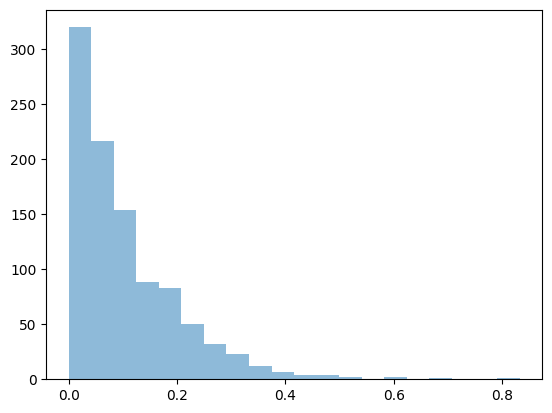

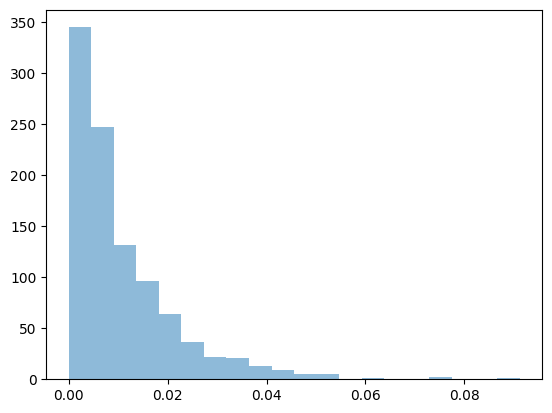

In [11]:
def graph_error_1(epsilon):    
    errors = [pct_error(query_1(), query_1_dp(epsilon)) for i in range(1000)]
    plt.hist(errors, bins=20, alpha=0.5)
    return plt.show()
    
graph_error_1(0.1)
graph_error_1(1.0)

### Question 5 (3 points)
- En quoi l'histogramme des erreurs relatives pour $\epsilon=0.1$ diffère de celui pour $\epsilon=1.0$
- Que pouvez-vous conclure sur l'impact de la valeur de $\epsilon$ sur l'erreur relative?

TODO

### Question 6 (2 points)
Proposez une fonction `query_2` pour répondre à la question suivante: "Combien de personnes ont plus de 60 ans?"

In [12]:
def query_2():
    return adult[adult['Age'] > 60].shape[0]
    
query_2()

1806

### Question 7 (4 points)
Comme pour la **Question 3**, proposez une version différentiellement confidentielle `query_2_dp` de `query_2`, avec $\epsilon=0.1$.

In [13]:
def query_2_dp(epsilon):
    return laplace_mech(query_2(), 1, epsilon)
    
query_2_dp(0.1)

1809.424691296802

### Question 8 (4 points)
- Comme pour la **Question 4**, proposez une fonction `graph_error_2`, qui affiche l'erreur relative de `query_2_dp`
- Afficher sur un même graphe les courbes de la distribution des erreurs avec `graph_error_1` et `graph_error_2` pour $\epsilon=1.0$

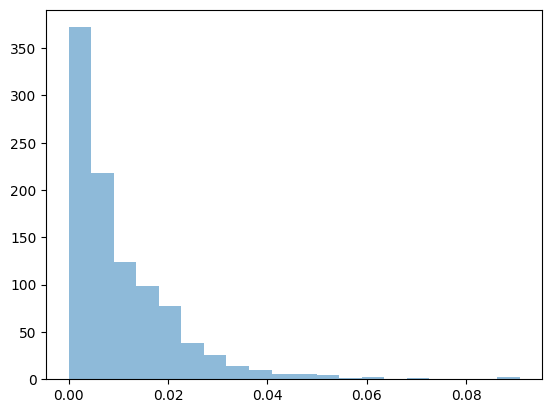

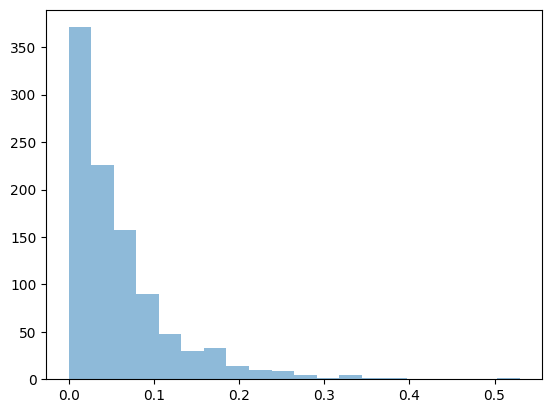

In [14]:
def graph_error_2(epsilon):
    errors = [pct_error(query_2(), query_2_dp(epsilon)) for i in range(1000)]
    plt.hist(errors, bins=20, alpha=0.5)
    return plt.show()
    
graph_error_1(1.0)
graph_error_2(1.0)

### Question 9 (3 points)
- À l'aide des graphes obtenus avec la **Question 8**, expliquez comment le méchanisme `query_1_dp` diffère du mécanisme `query_2_dp` en terme d'erreur relative pour une même valeur du paramètre $\epsilon$.
- Quelle est la raison de cette différence?

TODO

### Question 10 (4 points)
Considérons l'attaque de différenciation `differencing_attack` suivante:

In [15]:
def differencing_attack():
    q1 = adult['Hours per week'].sum()
    q2 = adult[adult['Name'] != 'Faith McCloughlin']['Hours per week'].sum()
    return q1 - q2

print("Résultat de l'attaque de différenciation", differencing_attack())

Résultat de l'attaque de différenciation 40


Le résultat du code précédent montre comment un adversaire, observant la publication des 
statisques (publiées à différent moment) du jeu de données, pourrait déduire le nombre d'heures de travail de Faith McCloughlin.

On suppose que le nombre d'heure de travail maximal d'un individu est de 100 heures
- À l'aide de la fonction `laplace_mech` proposez une version différentiellement confidentielle `differencing_attack_dp` de `differencing_attack`.

- Utilisez `epsilon=1.0`.

- Que pouvez-vous conclure par rapport à l'efficaté des attaques de différienciation sur des requêtes différentiellement confidentielles?

In [16]:
def differencing_attack_dp():
    return laplace_mech(differencing_attack(), 1, 1)

print("Résultat de l'attaque de différenciation privée", differencing_attack_dp())

Résultat de l'attaque de différenciation privée 39.72870146379948


#TODO Que pouvez-vous conclure par rapport à l'efficaté des attaques de différienciation sur des requêtes différentiellement confidentielles?

### Question 11 (3 points)
- Complétez la définition de la fonction `dp_sum_capgain` qui calcule la somme de la colonne `Capital Gain` du jeu de donné `adult` de manière différentiellement confidentielle. La fonction devra prendre en argument `epsilon` et avoir un budget total de confidentialité de `epsilon`
- Calculer cette somme pour $\epsilon=1.0$
- On supposera que la valeur minimale (resp. maximale) du 'Capital Gain' est 0 (resp. 100000). Il faut donc utiliser la fonction clip pour transformer la colonne `Capital Gain` avant d'appliquer le bruit.

In [21]:
def dp_sum_capgain(epsilon):
    return laplace_mech(adult['Capital Gain'].sum(), 1, epsilon)
    
dp_sum_capgain(1.0)

32937142.572112862

### Question 12 (3 points)
- Expliquez comment votre implementation de `dp_sum_capgain` satisfait à la contrainte du budet total de `epsilon`
- Quelle est la sensibilité de la requête utilisée dans `dp_sum_capgain`?

#TODO Expliquez comment votre implementation de `dp_sum_capgain` satisfait à la contrainte du budet total

In [27]:
#Quelle est la sensibilité de la requête utilisée dans `dp_sum_capgain`?
def global_sensitivity_sum_capgain():
    return adult['Capital Gain'].value_counts().max()

global_sensitivity_sum_capgain()

27624

### Question 13 (3 points)
- Complétez la définition de la fonction `dp_avg_capgain` qui calcule la moyenne de la colonne `Capital Gain` du jeu de données `adult` de manière différentiellement confidentielle. La fonction devra prendre en argument `epsilon`, utiliser la fonction `dp_sum_capgain`, et avoir un budget total de confidentialité de`epsilon`
- Calculer cette moyenne pour $\epsilon=1.0$

In [39]:
def dp_avg_capgain(epsilon):
    return dp_sum_capgain(epsilon) / adult.shape[0]

dp_avg_capgain(1.0)

1092.007840925984

### Question 14 (3 points)
- Expliquez comment votre implementation de `dp_avg_capgain` satisfait à la contrainte du budget total de `epsilon`.
- Quelles sont les deux propriétés de la confidentialité différentielle que vous avez utilisé pour calculer ce budget total?

#TODO

### Question 15 (4 points)
- Complétez la définition de la fonction `dp_occupation_histogram` qui calcule l'histogramme de la colonne `Occupation` du jeu de données `adult` de manière différentiellement confidentielle. La fonction devra prendre en argument `epsilon`, utiliser la composition parallèle et avoir un budget total de confidentialité de `epsilon`
- Calculer cet histogramme pour $\epsilon=1.0$

- *Astuce*: Pensez à utliser les fonctions `value_counts` et `apply` de `pandas` ainsi que la fonction `laplace_mech`

In [40]:
def dp_occupation_histogram(epsilon):
    return adult['Occupation'].value_counts().apply(lambda x: laplace_mech(x, 1, epsilon))
    
dp_occupation_histogram(1.0)

Occupation
Prof-specialty       4038.506554
Craft-repair         4029.793166
Exec-managerial      3990.508245
Adm-clerical         3718.957276
Sales                3581.624940
Other-service        3210.577385
Machine-op-inspct    1967.114821
Transport-moving     1571.773098
Handlers-cleaners    1350.125332
Farming-fishing       988.932294
Tech-support          912.110153
Protective-serv       643.124536
Priv-house-serv       142.701587
Armed-Forces            8.998867
Name: count, dtype: float64

### Question 16 (3 points)
- Expliquez comment votre implementation de `dp_occupation_histogram` satisfait à la contrainte du budget total de `epsilon`.
- Comment vos résultats changeraient-ils (en termes de précision) si vous aviez utilisé la composition séquentielle au lieu de la composition parallèle pour implémenter `dp_occupation_histogram`, et pourquoi ?
- Si vous partitionnez les données par *à la fois* la profession et l'âge (c'est-à-dire un tableau de contingence), la composition parallèle s'appliquerait-elle toujours ? Justifiez votre réponse
- Si vous partitionnez les données à la fois par profession et par âge, qu'adviendrait-il de la précision? Justifiez votre réponse

#TODO

### Question 17 (4 points)
- Complétez la définition de la fonction `dp_crosstab_education_sex` qui calcule la table de contingence des colonnes `Education` et `Sex` du jeu de données `adult` de manière différentiellement confidentielle. La fonction devra prendre en argument `epsilon`, utiliser la composition parallèle et avoir un budget total de confidentialité de `epsilon`
- Calculer cette table de contigence pour $\epsilon=1.0$

- *Astuce*: Pensez à utliser les fonctions `crosstab` et `applymap` de `pandas` ainsi que la fonction `laplace_mech`

In [44]:
def dp_crosstab_education_sex(epsilon):
    crosstab = pd.crosstab(adult['Education'], adult['Sex'])
    return crosstab.apply(lambda col: col.map(lambda x: laplace_mech(x, 1, epsilon)))

dp_crosstab_education_sex(1.0)

Sex,Female,Male
Education,,
10th,251.357285,571.908615
11th,371.184946,675.586931
12th,124.154454,256.206234
1st-4th,42.862346,107.635944
5th-6th,66.743758,219.496790
7th-8th,130.873366,423.356745
9th,117.333734,338.333659
Assoc-acdm,395.528420,612.189867
Assoc-voc,455.438430,852.997991


### Question 18 (3 points)
- Expliquez comment votre implementation de `dp_crosstab_education_sex` satisfait à la contrainte du budget total de `epsilon`.
- Le nombre de colonnes utilisées dans la construction de la table de contingence a-t-il une incidence sur le coût de la confidentialité ? Justifiez votre réponse
- Le nombre de colonnes utilisées dans la construction de la table de contingence a-t-il une incidence sur la précision ? Justifiez votre réponse

#TODO

### Question 19 (3 points)
- Comment les mécanismes de Laplace et Gaussien se comparent-ils en termes d'erreur relative sur la requête "Combien de personnes ont plus de 60 ans?" pour $\epsilon = 1$ et $\delta = 10^{-5}$
- Pour répondre à cette question: 
    - Servez-vous des fonctions `query_2_dp` et `graph_error_2` utilisées dans les **Questions 7** et **8** 
    - Développez leur équivalent pour le mécanisme Gaussien à l'aide de la fonction `gaussian_mech`
    - Affichez les deux courbes d'erreurs relative sur le même graphe

#TODO

### Question 20 (3 points)
Proposez une version vectorisée `laplace_mech_vec` de la fonction `laplace_mech`

In [47]:
def laplace_mech_vec(vec, sensitivity, epsilon):
    for i in range(len(vec)):
        vec[i] = laplace_mech(vec[i], sensitivity, epsilon)
    return vec

laplace_mech_vec([1,2,3,4], 1, 1.0)

[0.5859915478467198, 1.6653668714693743, 2.496621935447498, 3.3181109454502486]

### Question 21 (3 points)
Proposez une version vectorisée `gaussian_mech_vec` de la fonction `gaussian_mech`

In [55]:
def gaussian_mech_vec(vec, sensitivity, epsilon, delta):
    for i in range(len(vec)):
        vec[i] = gaussian_mech(vec[i], sensitivity, epsilon, delta)
    return vec

gaussian_mech_vec([1,2,3,4], 1, 1.0, 1e-5)

[0.5315618224484451, 4.444613666581056, 6.543052915315501, -11.213933675280652]

### Question 22 (3 points)
Considérez le code ci-dessous, qui définit trois requêtes d'agrégation et les exécute sur le jeu de données `adult`, en utilisant le mécanisme de Laplace pour fournir une confidentialité différentielle avec $\epsilon = 1$ pour chaque requête.

In [56]:
b_capgain = 10000
b_age = 3000
epsilon = 1.0

def query1():
    return np.sum(adult['Capital Gain'].clip(lower=0, upper=b_capgain))

def query2():
    return len(adult[adult['Education-Num'] < 10])

def query3():
    return np.sum(adult['Age'].clip(lower=0, upper=b_age))

def my_query():
    return [query1(), query2(), query3()]

my_query()

[16204658, 13581, 1159364]

- Quelle est la sensibilité globale $l_1$ de la fonction `my_query`? Justifiez votre réponse
- Quelle est la sensibilité globale $l_2$ de la fonction `my_query`? Justifiez votre réponse

#TODO

### Question 23 (4 points)
Proposer une fonction `my_query_lap` pour publier les résultats de l'appel de `my_query()` avec le mécanisme Laplace, sans utiliser la composition séquentielle.

*Astuce* : Utilisez `laplace_mech_vec`, en faisant attention à la sensibilité !

In [58]:
def my_query_lap(epsilon):
    return laplace_mech_vec(my_query(), 1, epsilon)

my_query_lap(1.0)

[16204657.783981323, 13583.098483061636, 1159365.3153703762]

### Question 24 (4 points)
Proposer une fonction `my_query_gauss` pour publier les résultats de l'appel de `my_query()` avec le mécanisme Gaussien, sans utiliser la composition séquentielle.

*Astuce* : Utilisez `gaussian_mech_vec`, en faisant attention à la sensibilité !

In [59]:
def my_query_gauss(epsilon, delta):
    return gaussian_mech_vec(my_query(), 1, epsilon, delta)

my_query_gauss(1.0, 1e-5)

[16204652.141439658, 13585.752782824658, 1159363.832229368]

### Question 25 (3 points)
- Le code ci-dessous définit un ensemble fini d'options pour la colonne `Marital Status`. 
- Proposer une *fonction de scoring* `score` qui renvoie des scores élevés pour les statuts matrimoniaux courants et des scores faibles pour les statuts peu courants (par exemple, le score peut être le nombre de personnes ayant ce statut).

In [60]:
options = list(adult['Marital Status'].unique())

In [62]:
def score(option):
    return adult['Marital Status'].value_counts()[option]
    
score('Married-AF-spouse')

21

In [63]:
# test unitaire
assert score('Never-married') == 9726

### Question 26 (4 points)
- À l'aide de la méthode `laplace_mech` implémentez le mécanisme `report_noisy_max` qui retourne l'élement ayant le plus grand score dans une liste d'élements

In [65]:
def report_noisy_max(elmts, score, sensitivity, epsilon):
    return max(elmts, key=lambda x: laplace_mech(score(x), sensitivity, epsilon))
    
report_noisy_max(options, score, 1, 1)

'Married-civ-spouse'

### Partie II (15 points)

### Question 27 (3 points)
- Installez la librairie `dduo-python` en suivant les instructions sur le repo github officiel ([Lien ici](https://github.com/uvm-plaid/dduo-python))
- En se basant sur le github officiel ([Lien ici](https://github.com/uvm-plaid/dduo-python)) et le papier décrivant la librairie `dduo-python` ([lien ici
](https://arxiv.org/pdf/2103.08805.pdf)), (1) donnez une description générale de la librairie, (2) nommez deux fonctionnalités de cette librairies et (3) montrez comment elle peut assister dans le design de mécanismes différentiellement confidentiels

In [ ]:
# importation des librairies
import duet
from duet import pandas as pd
from duet import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# importation du jeux de données
adult = pd.read_csv('https://github.com/tisl-lab/data-privacy-class/blob/main/data/adult_with_pii.csv?raw=true')
adult = adult.dropna()

DDUO est une librairie permettant l'analyse statistique de données en offrant une garantie de confidentialité au niveau individuel, en effet cette librairie utilise le concept de confidentialité différentielle.

Plusieurs fonctionnalités uniques sont offertes par cette librairie :
- Le support de multiples types de données sans ajouter un système de type complexe. 
- Le support d'opérations communément utilisées dans les language d'apprentissage machine (AI).
-Le support du suivi des informations confidentielles transformées dans des librairies populaires d'analyse de données.

### Question 28 (3 points)
- À l'aide de la librairie `dduo-python`, proposez un mécanisme générique de comptage `dp_counting_query` qui prend en entrées, `un dataframe`, `une expression` (i.e., condition sur des colonnes) et `une valeur de epsilon` et qui retourne le compte bruité à l'aide du **mécanisme Laplace**. Vous devez utiliser pour cette question la fonction `duet.laplace`
- À l'aide du mécanisme `dp_counting_query` ainsi crée donner le compte bruité du nombre de femmes dont le métier (Occupation) est `Exec-managerial` pour epsilon = $0.1$
- À l'aide du tracker du budget de confidentialité `duet.EDOdometer()` montrer que le mécanisme ainsi implémenté a bien un budget de confidentialité de $0.1$

In [ ]:
adult = adult[(adult['Sex'] == 'Female')]
#print(pd.DataFrame(adult))
def dp_counting_query(df, expr, epsilon):
    col = expr[0]
    val = expr[1]
    val = df[df[col] == val].shape[0]
    return duet.laplace(val, ε=epsilon)

epsilon = 0.1
with duet.EDOdometer() as odo:
    print('Query result:', dp_counting_query(adult, ['Occupation', 'Exec-managerial'], epsilon))
    print('Privacy cost:', odo)

La vrai valeur est 1143, l'exécution de la fonction nous donne les résultats suivants:
-1135.2102309902275
-1146.6786548430853
-1140.9630264090742

Tous a moins de 0.1 de dérivation par rapport à la vrai valeur, et chacun avec un privacy cost de 0.1.

### Question 29 (3 points)
- À l'aide de la librairie `dduo-python`, proposez un mécanisme de calcul d'histogramme `dp_histogram` qui prend en entrées, `un dataframe`, `une colonne` et `une valeur de epsilon` et qui retourne le l'histogramme bruité à l'aide du **mécanisme Laplace** et la composition parallèle. Vous devez utiliser pour cette question la fonction `duet.laplace`
- À l'aide du mécanisme `dp_histogram` ainsi crée donner l'histogramme bruité de la colonne `Occupation` pour epsilon = $0.1$
- À l'aide du tracker du budget de confidentialité `duet.EDOdometer()` montrer que le mécanisme ainsi implémenté a bien un budet de confidentialité de $0.1$

In [ ]:
def hist_dp(df, col, vals, epsilon):
    """ Returns a differentially private histogram
    using the laplace function
    
    Args:
    df -- dataframe 
    col -- column in the dataframe to count
    lower -- lower value to start from
    upper -- upper value to end at
    epsilon -- epsilon value for DP
    """

    vals = [v for v in df[col].unique()]
    hist = [(df[df[col] == val]).shape[0] for val in vals]
    noisy_hist = [duet.laplace(v, ε=epsilon/len(vals)) for v in hist]
    return noisy_hist

epsilon = 0.1
with duet.EDOdometer() as odo:
    vals = [v for v in adult_data['Occupation'].unique()]
    hist = hist_dp(adult_data, 'Occupation', vals, epsilon)

    #labels = [unwrap(v) for v in vals]
    #print(hist)
    #print(dict(zip(labels, hist)))

    print('Privacy cost:', odo)
    plt.plot(hist);
    plt.show()

Privacy cost: ([DataSource(adult_with_pii.csv): (0.1, 0)])

### Question 30 (6 points)
- Installez la librairie `smartnoise-synth` en suivant les instructions sur le repo github officiel ([Lien ici](https://github.com/opendp/smartnoise-sdk/tree/main/synth))
- En se basant sur le github officiel ([Lien ici](https://github.com/opendp/smartnoise-sdk/tree/main/synth)) et la documentation ([lien ici
](https://docs.smartnoise.org/synth/index.html)), donnez une description générale de la librairie
- Quelle est la différence entre **Synthétiseurs marginaux** (`Marginal Synthesizers`) et **Synthétiseurs à base de réseaux de neuronnes** (`Neural Network Synthesizers`)
- Expliquez en quelques phrases le principe de focntionnement du mécanisme **Multiplicative Weights Exponential Mechanism** (`MWEM`)
- À l'aide de ce mécanisme, proposer un script qui génère une version synthétique du jeu de données `Adult`. Vous devez expliquer les différentes partie du script.